In [1]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


## R

In [2]:
#rdir = '/workspace'
rdir = '../../..'
dat_files = natsort(glob2.glob(rdir + '/temp_results/results/R/**/*.dat'))
len(dat_files)
#dat_files

36

In [3]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'ndp.subzone',
            'ndp.lRidge', 'ndp.rRidge', 'realtime']

In [22]:
data = []
realtime = []
gooddata = []
col = 'nuTop'

for i in range(len(dat_files)):
    
    try:
        df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
        df.columns = columns2 
        realtime.append(df['realtime'])
        data.append(df[col])
        gooddata.append(i)
        #print(i)
    except:
        pass
    #    data.append(['NaN']*30)
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

data = np.array(data)
realtime = np.array(realtime)

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


dict_files = natsort(glob2.glob(rdir + '/temp_results/results/R/**/md.pkl'))
import pickle
dicts= []
for df in dict_files:
    with open(df,'rb') as f:
        dicts.append(pickle.load(f))
        
dict_sets = [set(d.iteritems()) for d in dicts]
diff_keys = [i[0] for i in set.difference(dict_sets[0], set.intersection(*map(set,dict_sets)))]

clean_dicts = []
for adict in dicts:
    red_dict= dict((k,adict[k]) for k in diff_keys if k in adict)
    clean_dicts.append(red_dict)
    
    
params = pd.DataFrame(clean_dicts)
#newdf = newdf.join(params)

In [23]:
[i + 1 for i in gooddata]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

In [24]:
import numpy as np
params = []
counter = 1
for a in ["Q1/dQ0", "Q2/DPC1"]:
    for b in ["True", "False"]:
        for c in [128, 192, 256]:
            for d in [25, 50, 75]:
            
                params.append([a,b,c,d, counter])
                counter +=1
#params = np.array(params)[gooddata]
params = np.array(params)

print(len(params))
params[25]

36


array(['Q2/DPC1', 'True', '256', '50', '26'], 
      dtype='|S7')

In [25]:
len(gooddata) == len(data) == len(params)#params

False

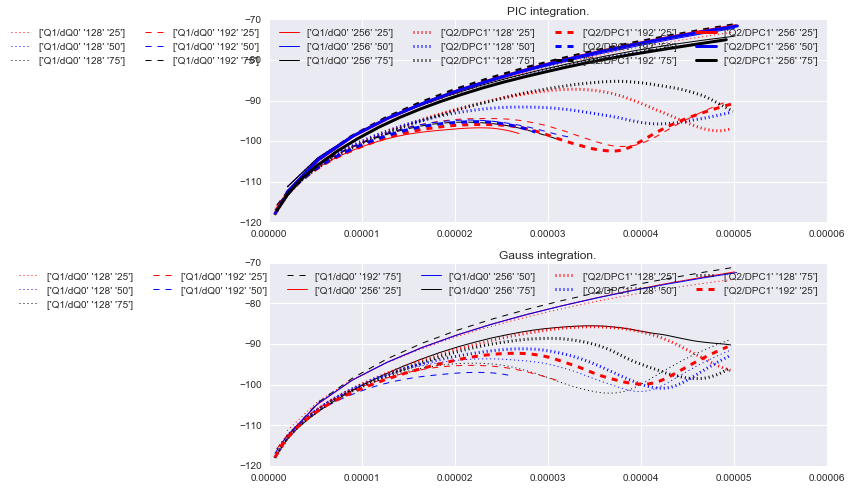

In [26]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


for i in range(realtime.shape[0] -1):
    
        #print(i, gooddata[i])
        if params[i][2] == '128':
            ls = ':'
        elif params[i][2] == '192':
            ls = '--'
        else:
            ls = '-'
        if params[i][3] == '25':
            c = 'r'
        elif params[i][3] == '50':
            c  = 'b'
        else:
            c = 'k'
        if params[i][3] == '25':
            c = 'r'
        elif params[i][3] == '50':
            c  = 'b'
        else:
            c = 'k'
        if params[i][0] == 'Q1/dQ0':
            lw = 1
        else:
            lw   = 3
            
        if params[i][1] == 'True':
            ax1.plot(realtime[i], data[i], linestyle=ls, c=c, lw=lw, label=str((params[i][[0,2,3]])))
        else:
            ax2.plot(realtime[i], data[i], linestyle=ls, c=c, lw=lw, label=str((params[i][[0,2,3]])))
 
ax1.set_title('PIC integration.')

ax2.set_title('Gauss integration.')





ax1.set_xlim(0, 0.00006)
#ax1.set_ylim(0, 0.5e7)
ax2.set_xlim(0, 0.00006)
#ax2.set_ylim(0, 0.5e7)



ax1.legend(ncol=6)

ax2.legend(ncol=6)


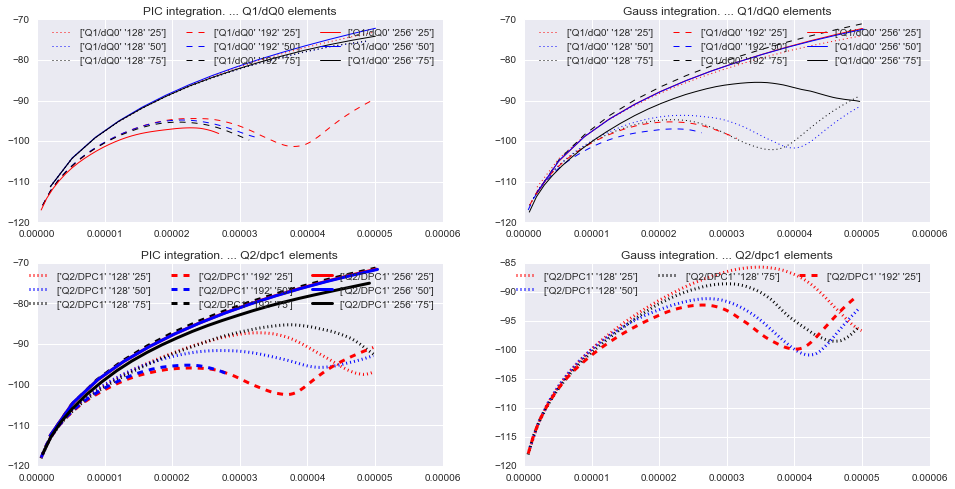

In [27]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

for i in range(realtime.shape[0] -1):
    
        #print(i, gooddata[i])
        if params[i][2] == '128':
            ls = ':'
        elif params[i][2] == '192':
            ls = '--'
        else:
            ls = '-'
        if params[i][3] == '25':
            c = 'r'
        elif params[i][3] == '50':
            c  = 'b'
        else:
            c = 'k'
        if params[i][3] == '25':
            c = 'r'
        elif params[i][3] == '50':
            c  = 'b'
        else:
            c = 'k'
        if params[i][0] == 'Q1/dQ0':
            lw = 1
        else:
            lw   = 3
            
        if params[i][1] == 'True':
            if params[i][0] == 'Q1/dQ0':
                ax1.plot(realtime[i], data[i], linestyle=ls, c=c, lw=lw, label=str((params[i][[0,2,3]])))
            else:
                ax3.plot(realtime[i], data[i], linestyle=ls, c=c, lw=lw, label=str((params[i][[0,2,3]])))
        else:
            if params[i][0] == 'Q1/dQ0':
                ax2.plot(realtime[i], data[i], linestyle=ls, c=c, lw=lw, label=str((params[i][[0,2,3]])))
            else:
                ax4.plot(realtime[i], data[i], linestyle=ls, c=c, lw=lw, label=str((params[i][[0,2,3]])))
 
ax1.set_title('PIC integration. ... Q1/dQ0 elements')
ax3.set_title('PIC integration. ... Q2/dpc1 elements')

ax2.set_title('Gauss integration. ... Q1/dQ0 elements')
ax4.set_title('Gauss integration. ... Q2/dpc1 elements')





ax1.set_xlim(0, 0.00006)
#ax1.set_ylim(0, 0.5e7)
ax2.set_xlim(0, 0.00006)
#ax2.set_ylim(0, 0.5e7)
ax3.set_xlim(0, 0.00006)
#ax3.set_ylim(0, 0.5e7)
ax4.set_xlim(0, 0.00006)
#ax4.set_ylim(0, 0.5e7)


ax1.legend(ncol=3)

ax2.legend(ncol=3)
ax3.legend(ncol=3)
ax4.legend(ncol=3)

Note the resoltion for the q2 models is half the recoded. 256 => 128. However, ppc numbers are correct. 

Conclusions:

Much closer spread in PIC integration than Gauss.
Reasonable agreement between: 
    Q2 elements at 128 res, 50, 75 ppc
    Q1 elements 192 / 256, 25, 50, 75 ppc
    
    
Q2 at 128 res, 50 ppc, seems like a good mix of speed and accuracy. 
   
The relatively close agreement between 25, 50. 75 ppc, for  q1/192, is surprising - as it it was diverging results that intially led me to running this test.

Future tests. Adjust ppc for element type /res. 75 ppc is way too high for q1/192. These models didn't run very far at all. Also run both on 16 and 32 procs. Can do this for a much smaller subset. 
    

## Reproducibility

In [28]:
rdir = '../../../temp_results'

t26 = rdir + '/results_modelT_26.dat'
dft26 = pd.read_csv(t26, sep="\s*", header=None,  index_col=False).dropna() 



dft26.columns = columns2

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


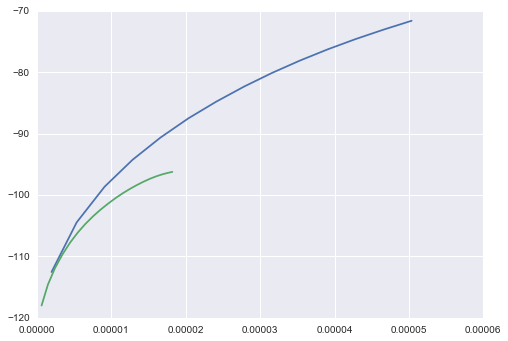

In [30]:
fig , ax = plt.subplots()

ax.plot(realtime[25], data[25])
ax.plot(dft26['realtime'], dft26[col])

# A

In [2]:
#rdir = '/workspace'
rdir = '../../..'
dat_files = natsort(glob2.glob(rdir + '/temp_results/results/A/**/*.dat'))

In [3]:
len(dat_files)

108

In [4]:
columns = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone', 'realtime' ]


data = []

for i in range(len(dat_files)):
    df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
    data.append(df.min())
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

del df
newdf = pd.DataFrame(data)
    
newdf.columns = columns

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [5]:
op_age_fac=[] 
cohesion=[] 
fc=[]
Edf=[]

counter = 1
for a in [0.2, 1.0, 2.0]:
    for b in [0.5, 1.0, 2.0, 4.0]:
        for c in [0.5, 1.0, 2.0]:
            for d in [0.1, 1.0, 10.0]:     
                op_age_fac.append(a)
                cohesion.append(b)
                fc.append(c)
                Edf.append(d)
                #print(counter, a, b, c, d)
                counter += 1


In [6]:

newdf['op_age_fac'] = op_age_fac #Constant viscosity crust an inteface
newdf['cohesion'] = cohesion
newdf['fc'] = fc
newdf['Edf'] = Edf

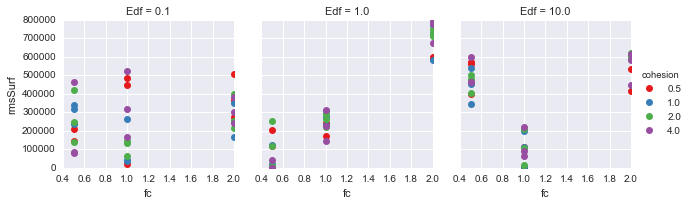

In [7]:
yaxis = columns[22] #'rmsSurf'#, 'nuTop' #


kws = dict(marker="o", linestyle="") 


g = sns.FacetGrid(newdf,  col = 'Edf', hue="cohesion", palette="Set1")
g = g.map(plt.plot, 'fc', yaxis,  **kws).add_legend()
#.set(ylim=(0, 30000))


#g.fig.get_axes()[0].set_xscale('log')
plt.show()


In [8]:
#newdf['subzone']

In [9]:
newdf['plateness'].idxmax(), newdf['plateness'].max()

(87, 0.35602342529299996)

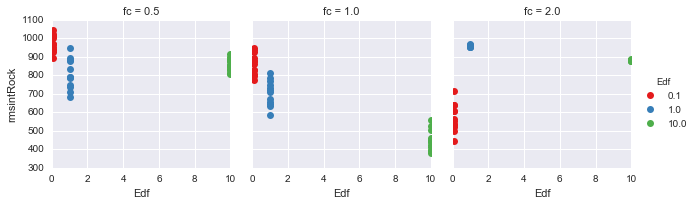

In [10]:
yaxis = 'rmsintRock' #'rmsSurf'#, 'nuTop' #


kws = dict(marker="o", linestyle="") 


g = sns.FacetGrid(newdf, col="fc", hue="Edf", palette="Set1")
g = g.map(plt.plot, 'Edf', yaxis,  **kws).add_legend()
#.set(ylim=(0, 30000))


#g.fig.get_axes()[0].set_xscale('log')
plt.show()


rmsintRock


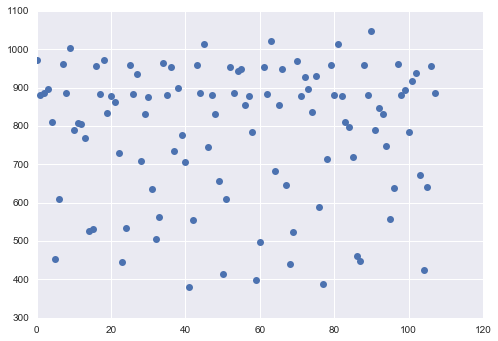

In [11]:
#filt_rows = [1, 5, 23]
col = 2

print(columns[col])

#for i in range(len(np.arange(0, newdf.shape[0]))):
    #print(i)
#    plt.plot(newdf[[col]].iloc[[i]], marker="o", linestyle="", label = str(np.arange(0, newdf.shape[0])[i]))
#plt.plot(newdf.iloc[filt_rows ][[col]], c='r', marker="o", linestyle="")
#plt.legend()


#for i in range(len(np.arange(0, newdf.shape[0]))):
    #print(i)
plt.plot( newdf[[col]], marker="o", linestyle="")
#plt.plot(newdf.iloc[filt_rows ][[col]], c='r', marker="o", linestyle="")
#plt.legend()


# B

In [19]:
#rdir = '/workspace'
rdir = '../../..'
dat_files = natsort(glob2.glob(rdir + '/temp_results/results/B/**/*.dat'))


In [61]:
columns = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'ndp.subzone', 'realtime' ]


data = []

for i in range(len(dat_files)):
    df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False).dropna()
    data.append(df.max())
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

del df
newdf = pd.DataFrame(data)
    
newdf.columns = columns

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [62]:
#newdf

eta_min_crust = []
eta_max_crust= []
eta_min_interface=[]
eta_max_interface=[]
cc=[]
ci=[]
fcc=[]
fci=[]
for a in [0.01, 0.1, 1.0]:
    for b in [1.0, 10.0, 100.0, 1000.]:
        for c in [1.0, 0.1, 0.01]:
            for d in [1.0, 0.1, 0.01]:
                eta_min_crust.append(a) 
                eta_min_interface.append(a) 
                eta_max_crust.append(b)
                eta_max_interface.append(b)
                cc.append(c)
                ci.append(c)
                fcc.append(d)
                fci.append(d)

newdf['eta_min_crust'] = eta_min_crust
newdf['eta_max_crust'] = eta_max_crust
newdf['eta_min_interface'] = eta_min_interface
newdf['eta_max_interface'] = eta_max_interface
newdf['cc'] = cc
newdf['ci'] = ci
newdf['fcc'] = fcc
newdf['fci'] = fci

In [63]:
eta_min_crust=[] 
eta_max_crust=[] 
eta_min_interface=[]
eta_max_interface=[]
MANTLETOCRUST=[] 
eta0=[]
RES=[]

counter = 1
for a in [0.1, 0.5, 1.0, 2.0, 10.]:
    for b in [0.8, 1.2, 1.6]:
        for c in [0.5, 1.0, 2.0]:
            for d in [128, 192]:
                eta_min_crust.append(a)
                eta_max_crust.append(a) 
                eta_min_interface.append(a)
                eta_max_interface.append(a)
                MANTLETOCRUST.append(b)
                eta0.append(c)
                RES.append(d)
                #print(counter, a, b, c, d)
                counter += 1


In [73]:

newdf['MANTLETOCRUST'] = MANTLETOCRUST
newdf['eta0'] = eta0
newdf['RES'] = RES

newdf['eta_min_crust'] = eta_min_crust/newdf['eta0'] 
newdf['eta_max_crust'] = eta_max_crust/newdf['eta0'] 
newdf['eta_min_interface'] = eta_min_interface/newdf['eta0'] 
newdf['eta_max_interface'] = eta_max_interface/newdf['eta0']  #Constant viscosity crust an inteface

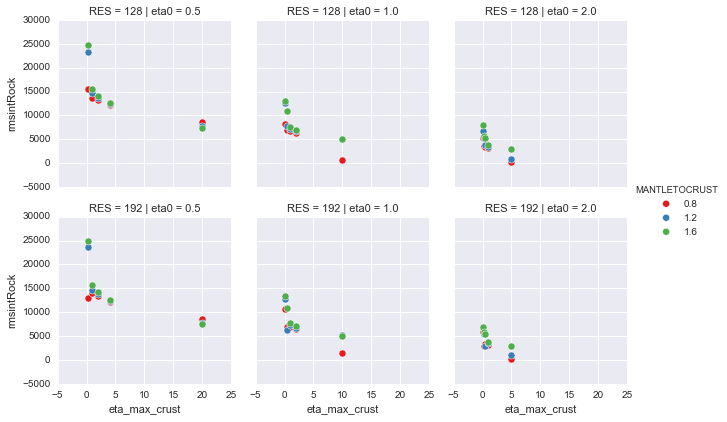

In [74]:
yaxis = 'rmsintRock' #'rmsSurf'#, 'nuTop' #

kws = dict(s=50, linewidth=.5, edgecolor="w")

g = sns.FacetGrid(newdf, col="eta0",  row='RES', hue="MANTLETOCRUST", palette="Set1")
g = g.map(plt.scatter, 'eta_max_crust', yaxis,  **kws).add_legend()
#.set(ylim=(0, 30000))


#g.fig.get_axes()[0].set_xscale('log')
plt.show()



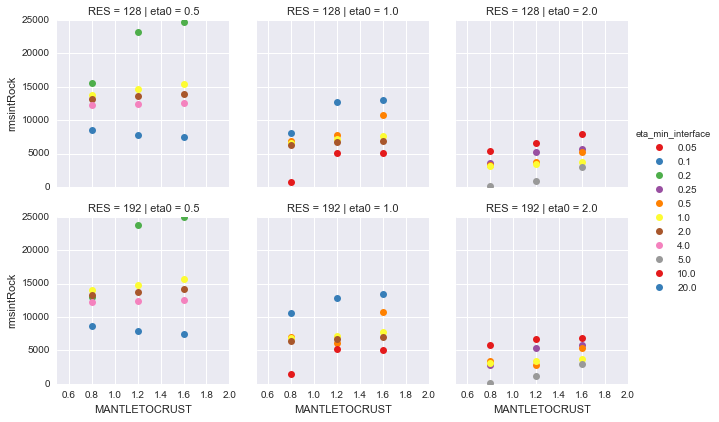

In [75]:
yaxis = 'rmsintRock' #'rmsSurf'#, , 'nuTop'#

kws = dict(marker="o", linestyle="") 


g = sns.FacetGrid(newdf, col="eta0",  row='RES', hue='eta_min_interface', palette="Set1")
g = g.map(plt.plot, 'MANTLETOCRUST',  yaxis, **kws).add_legend().set(xlim=(0.5, 2.0))


#here we use plt.plot as a hack, because scatter was not mapping the hue colours correctly
#https://github.com/mwaskom/seaborn/issues/840

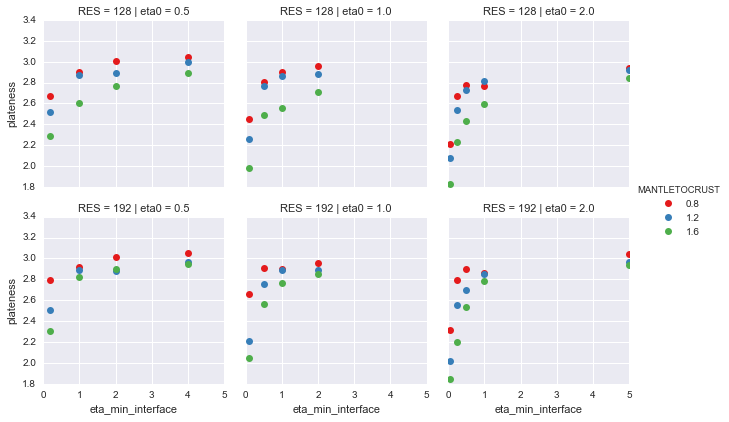

In [78]:
yaxis = 'plateness' #'rmsSurf'#, , 'nuTop'#

kws = dict(marker="o", linestyle="") 


g = sns.FacetGrid(newdf, col="eta0",  row='RES', hue='MANTLETOCRUST', palette="Set1")
g = g.map(plt.plot, 'eta_min_interface',  yaxis, **kws).add_legend().set(xlim=(0., 5.0))


#here we use plt.plot as a hack, because scatter was not mapping the hue colours correctly
#https://github.com/mwaskom/seaborn/issues/840

ndp.subzone


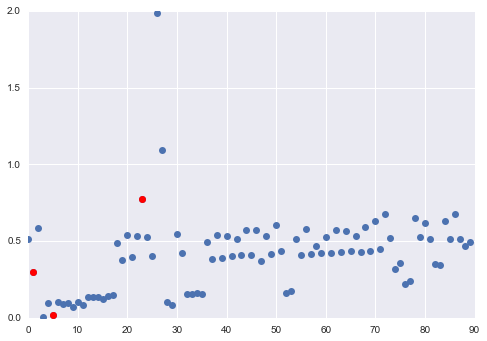

In [69]:
filt_rows = [1, 5, 23]
col = 26

print(columns[col])

#for i in range(len(np.arange(0, newdf.shape[0]))):
    #print(i)
#    plt.plot(newdf[[col]].iloc[[i]], marker="o", linestyle="", label = str(np.arange(0, newdf.shape[0])[i]))
#plt.plot(newdf.iloc[filt_rows ][[col]], c='r', marker="o", linestyle="")
#plt.legend()


#for i in range(len(np.arange(0, newdf.shape[0]))):
    #print(i)
plt.plot(newdf[[col]], marker="o", linestyle="")
plt.plot(newdf.iloc[filt_rows ][[col]], c='r', marker="o", linestyle="")
#plt.legend()



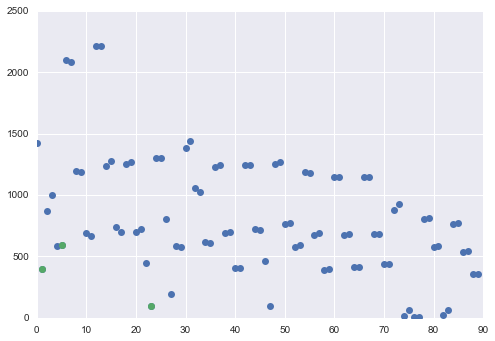

In [70]:
filt_rows = [1, 5, 23]

#for i in range(len(np.arange(0, newdf.shape[0]))):
    #print(i)
plt.plot(newdf['rmsintLith'] - newdf['rmsintLower'], marker="o", linestyle="")
#plt.plot(newdf.iloc[filt_rows ][[col]], c='r', marker="o", linestyle="")
plt.plot(newdf.iloc[filt_rows ]['rmsintLith'] - newdf.iloc[filt_rows ]['rmsintLower'], marker="o", linestyle="")

#plt.legend()


In [71]:
newdf['rmsintUpper'] = newdf['rmsintLith'] - newdf['rmsintLower']

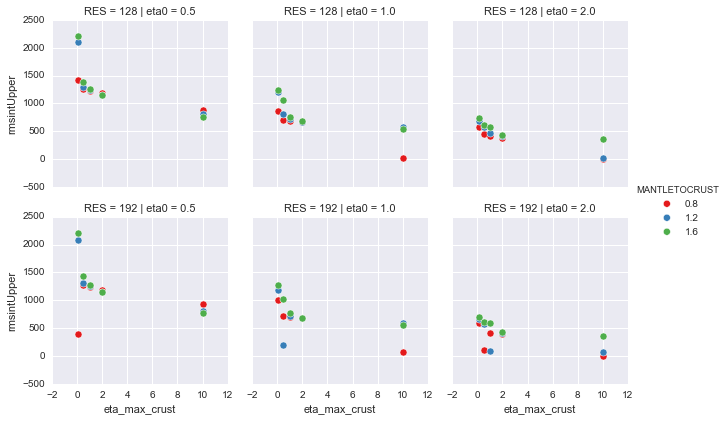

In [72]:
yaxis = 'rmsintUpper' #'rmsSurf'#, 'nuTop' #

kws = dict(s=50, linewidth=.5, edgecolor="w")

g = sns.FacetGrid(newdf, col="eta0",  row='RES', hue="MANTLETOCRUST", palette="Set1")
g = g.map(plt.scatter, 'eta_max_crust', yaxis,  **kws).add_legend()
#.set(ylim=(0, 30000))


#g.fig.get_axes()[0].set_xscale('log')
plt.show()

In [59]:
newdf[(newdf.eta0 > 1.0) &
      (newdf.MANTLETOCRUST <= 1.) &
      (newdf.rmsintUpper < 400.) &
      (newdf.eta_max_crust <= 1.0)
     ]

,areaintRock,tempintRock,rmsintRock,dwintRock,vdintRock,areaintLith,tempintLith,rmsintLith,dwintLith,vdintLith,...,ndp.subzone,realtime,eta_min_crust,eta_max_crust,eta_min_interface,eta_max_interface,MANTLETOCRUST,eta0,RES,rmsintUpper
4,4.0,3.719123,2998.216217,117.558578,1.205206e+08,0.663136,0.398896,807.384641,-148.280814,5.179100e+07,...,-0.054183,0.000987,0.1,0.1,0.1,0.1,0.8,2.0,128,357.862379
5,4.0,3.782584,3043.905165,98.041735,1.003675e+08,0.469283,0.261989,672.638028,-135.648311,4.445907e+07,...,-0.048177,0.000379,0.1,0.1,0.1,0.1,0.8,2.0,192,235.408061
22,4.0,3.730465,2028.899456,81.231367,8.319200e+07,0.606241,0.351112,576.166162,-103.603401,5.160383e+07,...,0.323674,0.001104,0.5,0.5,0.5,0.5,0.8,2.0,128,204.414249
23,4.0,3.754450,1216.342227,39.279016,4.033063e+07,0.544502,0.311327,267.033315,-61.580154,2.294563e+07,...,0.019051,0.000850,0.5,0.5,0.5,0.5,0.8,2.0,192,47.271389
40,4.0,3.731415,2032.693740,81.416114,8.329380e+07,0.599192,0.344878,572.855947,-103.395154,5.292540e+07,...,0.325144,0.001114,1.0,1.0,1.0,1.0,0.8,2.0,128,200.514313
41,4.0,3.762313,1841.399473,65.496456,6.700758e+07,0.513976,0.287927,465.829855,-88.158811,4.230132e+07,...,0.231399,0.000724,1.0,1.0,1.0,1.0,0.8,2.0,192,125.122567


In [79]:
newdf.iloc[filt_rows ]

,areaintRock,tempintRock,rmsintRock,dwintRock,vdintRock,areaintLith,tempintLith,rmsintLith,dwintLith,vdintLith,...,ndp.subzone,realtime,eta_min_crust,eta_max_crust,eta_min_interface,eta_max_interface,MANTLETOCRUST,eta0,RES,rmsintUpper
1,4.0,3.815297,13049.266817,490.949739,2.014180e+09,0.499047,0.288649,2608.179539,-59.461733,8.637853e+08,...,0.296875,0.000303,0.20,0.20,0.20,0.20,0.8,0.5,192,396.440031
5,4.0,3.814918,5833.682799,240.389145,2.456664e+08,0.542713,0.313962,1442.335676,-20.393164,9.020000e+07,...,0.015625,0.000639,0.05,0.05,0.05,0.05,0.8,2.0,192,589.368074
23,4.0,3.814556,2849.856680,101.130712,1.037328e+08,0.756376,0.457344,602.616052,-12.834485,4.363065e+07,...,0.776042,0.001990,0.25,0.25,0.25,0.25,0.8,2.0,192,99.739551


In [91]:
#0.01194*670

## D

In [45]:
#rdir = '/workspace'
rdir = '../../..'
dat_files = natsort(glob2.glob(rdir + '/temp_results/results/D/**/*.dat'))

In [52]:
columns = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone', 'realtime' ]


data = []

for i in range(len(dat_files)):
    df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
    data.append(df.mean())
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

del df
newdf = pd.DataFrame(data)
    
newdf.columns = columns

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [53]:
eta_min_crust=[] 
eta_max_crust=[] 
eta_min_interface=[]
eta_max_interface=[]
MANTLETOCRUST=[] 
eta0=[]


counter = 1
for a in [0.1, 0.5, 1.0, 2.0, 5.]:
    for b in [0.5, 1.0, 2.0]:
        for c in [0.75, 1.0]:
                eta_min_crust.append(a)
                eta_max_crust.append(a) 
                eta_min_interface.append(a)
                eta_max_interface.append(a)
                eta0.append(b)
                MANTLETOCRUST.append(c)
                print(counter, a, b, c)
                counter += 1

(1, 0.1, 0.5, 0.75)
(2, 0.1, 0.5, 1.0)
(3, 0.1, 1.0, 0.75)
(4, 0.1, 1.0, 1.0)
(5, 0.1, 2.0, 0.75)
(6, 0.1, 2.0, 1.0)
(7, 0.5, 0.5, 0.75)
(8, 0.5, 0.5, 1.0)
(9, 0.5, 1.0, 0.75)
(10, 0.5, 1.0, 1.0)
(11, 0.5, 2.0, 0.75)
(12, 0.5, 2.0, 1.0)
(13, 1.0, 0.5, 0.75)
(14, 1.0, 0.5, 1.0)
(15, 1.0, 1.0, 0.75)
(16, 1.0, 1.0, 1.0)
(17, 1.0, 2.0, 0.75)
(18, 1.0, 2.0, 1.0)
(19, 2.0, 0.5, 0.75)
(20, 2.0, 0.5, 1.0)
(21, 2.0, 1.0, 0.75)
(22, 2.0, 1.0, 1.0)
(23, 2.0, 2.0, 0.75)
(24, 2.0, 2.0, 1.0)
(25, 5.0, 0.5, 0.75)
(26, 5.0, 0.5, 1.0)
(27, 5.0, 1.0, 0.75)
(28, 5.0, 1.0, 1.0)
(29, 5.0, 2.0, 0.75)
(30, 5.0, 2.0, 1.0)


In [54]:

newdf['MANTLETOCRUST'] = MANTLETOCRUST
newdf['eta0'] = eta0

newdf['eta_min_crust'] = eta_min_crust/newdf['eta0'] 
newdf['eta_max_crust'] = eta_max_crust/newdf['eta0'] 
newdf['eta_min_interface'] = eta_min_interface/newdf['eta0'] 
newdf['eta_max_interface'] = eta_max_interface/newdf['eta0'] 

In [55]:
newdf['rmsintUpper'] = newdf['rmsintLith'] - newdf['rmsintLower']


newdf['rmsSurfScaled'] = (newdf['rmsSurf']/(2900.*1e3/1e-6))*(10.*3600*24*365)

In [56]:
#newdf['rmsSurfScaled']

time scaling:

The following should be in cm/y. 

Demonstrating that for these models, there is still quite a bit too much bouyancy in the system

the default eta0 is 2e20, so the only models that have near-earth-like plate velocities are thise with eta0 *=2, i.e. eta0 = 4e20, and even then, only at the highest plate interface strengths.


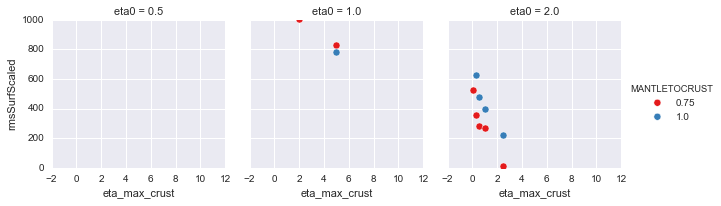

In [57]:
yaxis = 'rmsSurfScaled' #'rmsSurf'#, 'nuTop' #

kws = dict(s=50, linewidth=.5, edgecolor="w")

g = sns.FacetGrid(newdf, col="eta0", hue="MANTLETOCRUST", palette="Set1")
g = g.map(plt.scatter, 'eta_max_crust', yaxis,  **kws).add_legend()


g.set(ylim=(0, 1000))
plt.show()

## E 

In [3]:
#rdir = '/workspace'
rdir = '../../..'
dat_files = natsort(glob2.glob(rdir + '/temp_results/results/E/**/*.dat'))

In [4]:
columns = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone', 'realtime' ]


data = []

for i in range(len(dat_files)):
    df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
    data.append(df.min())
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

del df
newdf = pd.DataFrame(data)
    
newdf.columns = columns

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [5]:
dict_files = natsort(glob2.glob(rdir + '/temp_results/results/E/**/dp.pkl'))
import pickle
dicts= []
for df in dict_files:
    with open(df,'rb') as f:
        dicts.append(pickle.load(f))
        
dict_sets = [set(d.iteritems()) for d in dicts]
diff_keys = [i[0] for i in set.difference(dict_sets[0], set.intersection(*map(set,dict_sets)))]

clean_dicts = []
for adict in dicts:
    red_dict= dict((k,adict[k]) for k in diff_keys if k in adict)
    clean_dicts.append(red_dict)
    
    
params = pd.DataFrame(clean_dicts)
newdf = newdf.join(params)

eta_min_crust=[] 
eta_max_crust=[] 
eta_min_interface=[]
eta_max_interface=[]
MANTLETOCRUST=[] 
eta0=[]


counter = 1
for a in [0.1, 0.5, 1.0, 2.0, 10.]:
    for b in [1.0, 2.0, 5.0, 10.]:
        for c in [0.75, 1.0]:
                eta_min_crust.append(a)
                eta_max_crust.append(a) 
                eta_min_interface.append(a)
                eta_max_interface.append(a)
                eta0.append(b)
                MANTLETOCRUST.append(c)
                print(counter, a, b, c)
                counter += 1
                
newdf['MANTLETOCRUST'] = MANTLETOCRUST
newdf['eta0'] = eta0

newdf['eta_min_crust'] = (eta_min_crust/newdf['eta0'] )*0.1
newdf['eta_max_crust'] = (eta_max_crust/newdf['eta0'] )*0.1
newdf['eta_min_interface'] = (eta_min_interface/newdf['eta0'] )*0.1
newdf['eta_max_interface'] = (eta_max_interface/newdf['eta0'] )*0.1

In [6]:
newdf['rmsintUpper'] = newdf['rmsintLith'] - newdf['rmsintLower']


newdf['rmsSurfScaled'] = (newdf['rmsSurf']/(2900.*1e3/1e-6))*(10.*3600*24*365)


newdf['realtimeScaled'] = (newdf['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)

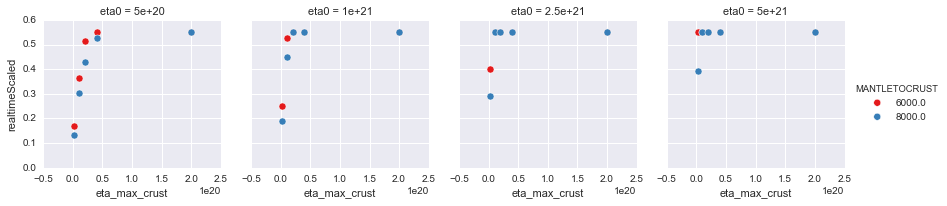

In [7]:
yaxis = 'realtimeScaled' #'rmsSurf'#, 'nuTop' #

kws = dict(s=50, linewidth=.5, edgecolor="w")

g = sns.FacetGrid(newdf, col="eta0", hue="MANTLETOCRUST", palette="Set1")
g = g.map(plt.scatter, 'eta_max_crust', yaxis,  **kws).add_legend()



#g.fig.get_axes()[0].set_yscale('log')
#g.set(ylim=(0, 0.0001))
plt.show()

In [14]:
np.unique(newdf['viscCrust'])

array([ 0.0004,  0.0008,  0.002 ,  0.004 ,  0.008 ,  0.01  ,  0.016 ,
        0.02  ,  0.04  ,  0.08  ,  0.2   ,  0.4   ])

(0.0002, 0.5)

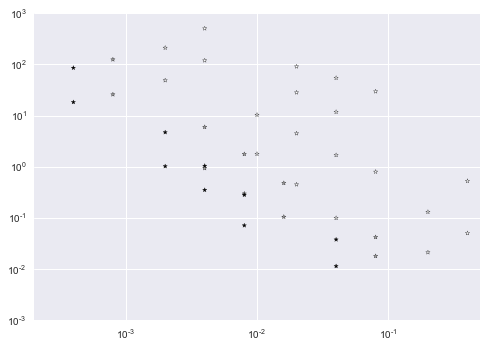

In [17]:

newdf['viscCrust'] = newdf['eta_max_crust']/newdf['eta0']

fig, ax = plt.subplots()
#ax.scatter(newdf[newdf['eta0']==10.]['eta_max_crust'], newdf[newdf['eta0']==10.]['rmsSurfScaled'], marker = '*', c='r')
#ax.scatter(newdf[newdf['eta0']==5.]['eta_max_crust'], newdf[newdf['eta0']==5.]['rmsSurfScaled'], marker = 'o', c='b' )
#ax.scatter(newdf[newdf['eta0']==2.]['eta_max_crust'], newdf[newdf['eta0']==2.]['rmsSurfScaled'], marker = '^', c='g' )
#ax.scatter(newdf[newdf['eta0']==1.]['eta_max_crust'], newdf[newdf['eta0']==1.]['rmsSurfScaled'], marker = '.', c='k' )
ax.scatter(newdf['viscCrust'], newdf['rmsSurfScaled'], marker = '*', c=newdf['eta0'])


ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim(0, 30)
ax.set_xlim(0.0002, 0.5)

#fig.show()


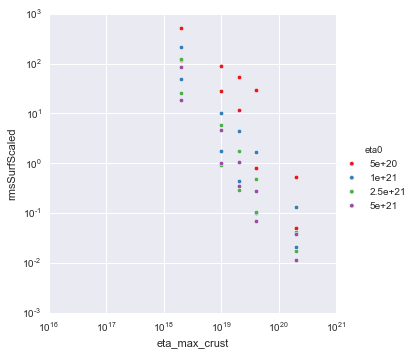

In [45]:
yaxis = 'rmsSurfScaled' #'rmsSurf'#, 'nuTop' #

kws = dict(s=20, linewidth=.5, edgecolor="w")

g = sns.FacetGrid(newdf,  hue="eta0", palette="Set1", size=5)
g = g.map(plt.scatter, 'eta_max_crust', yaxis,  **kws).add_legend()


g.set(ylim=(0.001, 1e3))
#g.set(xlim=(0.0002, 0.5))

g.fig.get_axes()[0].set_yscale('log')
g.fig.get_axes()[0].set_xscale('log')


plt.show()
#g.ax_marg_x.set_xscale('log')
#g.ax_marg_y.set_yscale('log')

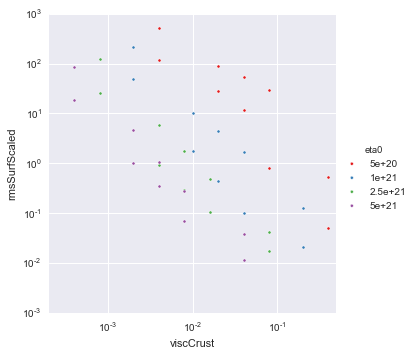

In [44]:
yaxis = 'rmsSurfScaled' #'rmsSurf'#, 'nuTop' #

kws = dict(s=10, linewidth=.5, edgecolor="w")

g = sns.FacetGrid(newdf,  hue="eta0", palette="Set1", size=5)
g = g.map(plt.scatter, 'viscCrust', yaxis,  **kws).add_legend()


g.set(ylim=(0.001, 1e3))
g.set(xlim=(0.0002, 0.5))

g.fig.get_axes()[0].set_yscale('log')
g.fig.get_axes()[0].set_xscale('log')


plt.show()
#g.ax_marg_x.set_xscale('log')
#g.ax_marg_y.set_yscale('log')

In [32]:
sns.FacetGrid?

## G

In [38]:
#rdir = '/workspace'
rdir = '../../..'
dat_files = natsort(glob2.glob(rdir + '/temp_results/results/G/**/*.dat'))

In [39]:
columns = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone', 'realtime' ]


data = []

for i in range(len(dat_files)):
    df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
    data.append(df.min())
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

del df
newdf = pd.DataFrame(data)
    
newdf.columns = columns

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [40]:
dict_files = natsort(glob2.glob(rdir + '/temp_results/results/G/**/dp.pkl'))
import pickle
dicts= []
for df in dict_files:
    with open(df,'rb') as f:
        dicts.append(pickle.load(f))
        
dict_sets = [set(d.iteritems()) for d in dicts]
diff_keys = [i[0] for i in set.difference(dict_sets[0], set.intersection(*map(set,dict_sets)))]

clean_dicts = []
for adict in dicts:
    red_dict= dict((k,adict[k]) for k in diff_keys if k in adict)
    clean_dicts.append(red_dict)
    
    
params = pd.DataFrame(clean_dicts)
newdf = newdf.join(params)

In [41]:
newdf['rmsintUpper'] = newdf['rmsintLith'] - newdf['rmsintLower']
newdf['rmsSurfScaled'] = (newdf['rmsSurf']/(2900.*1e3/1e-6))*(10.*3600*24*365)
newdf['realtimeScaled'] = (newdf['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
newdf['viscCrust'] = newdf['eta_max_crust']/newdf['eta0']


In [42]:
counter = 1
for a in [0.15, 0.25, 0.5]:
   for b in [0.5, 1.0, 2.0]:
      for c in [0.75, 1.0]:
        for d in [0.5, 1.0, 2.0]:
                print(counter, a, b, c, d)
                counter += 1

(1, 0.15, 0.5, 0.75, 0.5)
(2, 0.15, 0.5, 0.75, 1.0)
(3, 0.15, 0.5, 0.75, 2.0)
(4, 0.15, 0.5, 1.0, 0.5)
(5, 0.15, 0.5, 1.0, 1.0)
(6, 0.15, 0.5, 1.0, 2.0)
(7, 0.15, 1.0, 0.75, 0.5)
(8, 0.15, 1.0, 0.75, 1.0)
(9, 0.15, 1.0, 0.75, 2.0)
(10, 0.15, 1.0, 1.0, 0.5)
(11, 0.15, 1.0, 1.0, 1.0)
(12, 0.15, 1.0, 1.0, 2.0)
(13, 0.15, 2.0, 0.75, 0.5)
(14, 0.15, 2.0, 0.75, 1.0)
(15, 0.15, 2.0, 0.75, 2.0)
(16, 0.15, 2.0, 1.0, 0.5)
(17, 0.15, 2.0, 1.0, 1.0)
(18, 0.15, 2.0, 1.0, 2.0)
(19, 0.25, 0.5, 0.75, 0.5)
(20, 0.25, 0.5, 0.75, 1.0)
(21, 0.25, 0.5, 0.75, 2.0)
(22, 0.25, 0.5, 1.0, 0.5)
(23, 0.25, 0.5, 1.0, 1.0)
(24, 0.25, 0.5, 1.0, 2.0)
(25, 0.25, 1.0, 0.75, 0.5)
(26, 0.25, 1.0, 0.75, 1.0)
(27, 0.25, 1.0, 0.75, 2.0)
(28, 0.25, 1.0, 1.0, 0.5)
(29, 0.25, 1.0, 1.0, 1.0)
(30, 0.25, 1.0, 1.0, 2.0)
(31, 0.25, 2.0, 0.75, 0.5)
(32, 0.25, 2.0, 0.75, 1.0)
(33, 0.25, 2.0, 0.75, 2.0)
(34, 0.25, 2.0, 1.0, 0.5)
(35, 0.25, 2.0, 1.0, 1.0)
(36, 0.25, 2.0, 1.0, 2.0)
(37, 0.5, 0.5, 0.75, 0.5)
(38, 0.5, 0.5, 0.75, 1.0)
(39

In [43]:
crust_dict= {8000:'r',6000:'b'}

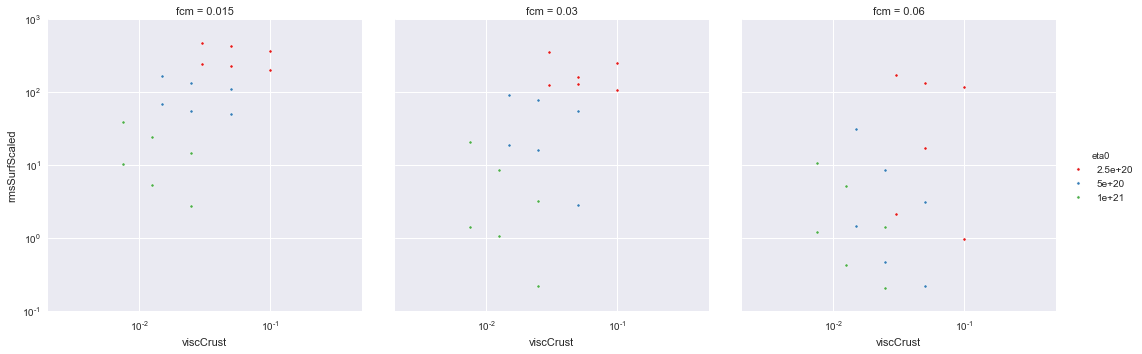

In [44]:
yaxis = 'rmsSurfScaled' #'rmsSurf'#, 'nuTop' #

kws = dict(s=10, linewidth=.5, edgecolor="w")

g = sns.FacetGrid(newdf,col='fcm', hue="eta0", palette="Set1", size=5)
g = g.map(plt.scatter, 'viscCrust', yaxis,  **kws).add_legend()


g.set(ylim=(0.1, 1e3))
g.set(xlim=(0.002, 0.5))

g.fig.get_axes()[0].set_yscale('log')
g.fig.get_axes()[0].set_xscale('log')
g.fig.get_axes()[1].set_yscale('log')
g.fig.get_axes()[1].set_xscale('log')
g.fig.get_axes()[2].set_yscale('log')
g.fig.get_axes()[2].set_xscale('log')




plt.show()


In [45]:
#files = natsort(glob2.glob(rdir + fext))

In [50]:

import os, sys
subdirectories = natsort(os.listdir(rdir + '/temp_results/results/G/'))

#Note the 4 is hardcoded - this should be the number of files per model - not necesarrily constant either. 
midswarmArray = np.ones((len(subdirectories), 4, 2)) 

for i, d in enumerate(subdirectories):
    fext = '/temp_results/results/G/' + d + '/**/*midSwarm*'
    files = natsort(glob2.glob(rdir + fext))
    for j, fileN in enumerate(files):
        #print(fileN)
        try:
            a = open_file(fileN)
            table = a.root.data
            data = table.read()
            midswarmArray[i, j] = data[data[:,1].argmin(), :]
        except:
            pass

In [51]:
midswarmArray.shape

(54, 4, 2)

(0.0, 0.1)

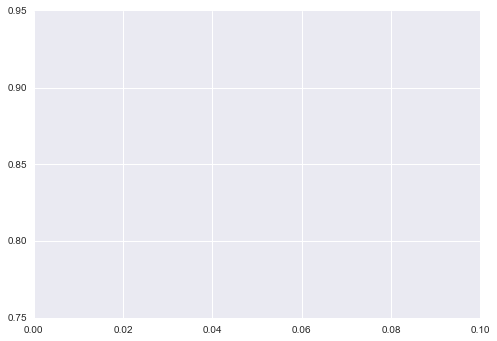

In [52]:
fig, ax = plt.subplots()

for i in range(midswarmArray.shape[0]):
    if float(newdf['eta0'].iloc[[i]]) == 1e21:
        c = 'r'
    elif float(newdf['eta0'].iloc[[i]]) == 5e20:
        c = 'b'
    else:
        c = 'g'
    s = float(newdf['fcm'].iloc[[i]]) *150
    #s = float(newdf['eta_max_crust'].iloc[[i]]) /2e18

    ax.plot(midswarmArray[i][:,0], midswarmArray[i][:,1], c=c, marker='o', markersize=s)
    
ax.set_ylim(0.75, 0.95)
ax.set_xlim(0., 0.1)

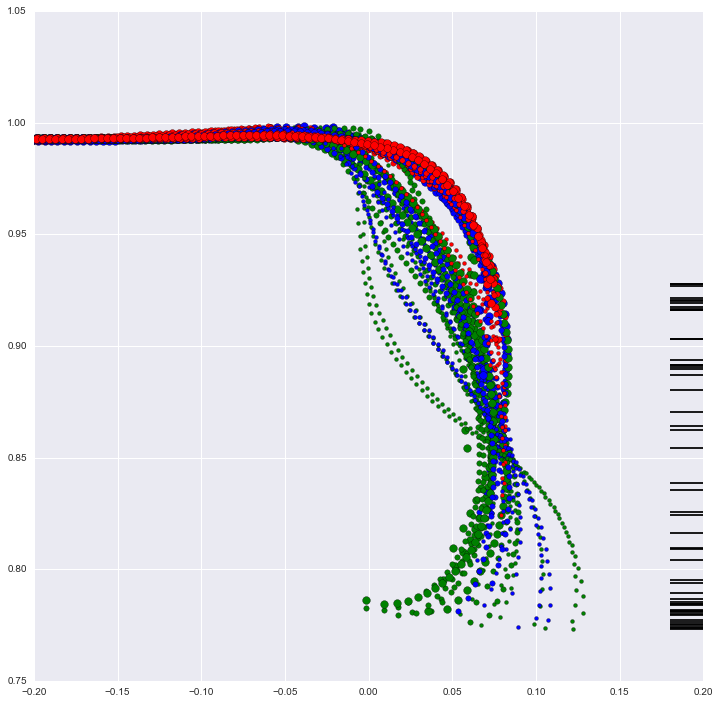

In [55]:
from tables import open_file

fig, ax = plt.subplots(figsize=(12,12))
for i, d in enumerate(subdirectories):
    fext = '/temp_results/results/G/' + d + '/**/*midSwarm*'
    files = natsort(glob2.glob(rdir + fext))
    #print(files)
    a = open_file(files[-1])
    table = a.root.data
    data = table.read()
    a.close()
    if float(newdf['eta0'].iloc[[i]]) == 1e21:
        c = 'r'
    elif float(newdf['eta0'].iloc[[i]]) == 5e20:
        c = 'b'
    else:
        c = 'g'
    s = float(newdf['fcm'].iloc[[i]]) *1000
    ax.scatter(data[:,0], data[:,1], c=c, s=s, marker='o')
    ax.hlines(data[:,1].min(), 0.18, 0.2 )
    
    ax.set_xlim(-0.2,0.2)

In [56]:
data[:,1].min()

0.91921187792633152

## H 

In [2]:
#rdir = '/workspace'
rdir = '../../..'
dat_files = natsort(glob2.glob(rdir + '/temp_results/results/H/**/*.dat'))

In [3]:
#dp.eta_min_crust*=$A dp.eta0*=$B dp.MANTLETOCRUST*=$C dp.fcm*=$D

counter = 1
for a in [0.1, 0.15, 0.25, 0.5]:
   for b in [0.5, 1.0, 2.0]:
      for c in [1.0]:
        for d in [0.5, 1.0, 2.0]:
                print(counter, a, b, c, d)
                counter += 1

(1, 0.1, 0.5, 1.0, 0.5)
(2, 0.1, 0.5, 1.0, 1.0)
(3, 0.1, 0.5, 1.0, 2.0)
(4, 0.1, 1.0, 1.0, 0.5)
(5, 0.1, 1.0, 1.0, 1.0)
(6, 0.1, 1.0, 1.0, 2.0)
(7, 0.1, 2.0, 1.0, 0.5)
(8, 0.1, 2.0, 1.0, 1.0)
(9, 0.1, 2.0, 1.0, 2.0)
(10, 0.15, 0.5, 1.0, 0.5)
(11, 0.15, 0.5, 1.0, 1.0)
(12, 0.15, 0.5, 1.0, 2.0)
(13, 0.15, 1.0, 1.0, 0.5)
(14, 0.15, 1.0, 1.0, 1.0)
(15, 0.15, 1.0, 1.0, 2.0)
(16, 0.15, 2.0, 1.0, 0.5)
(17, 0.15, 2.0, 1.0, 1.0)
(18, 0.15, 2.0, 1.0, 2.0)
(19, 0.25, 0.5, 1.0, 0.5)
(20, 0.25, 0.5, 1.0, 1.0)
(21, 0.25, 0.5, 1.0, 2.0)
(22, 0.25, 1.0, 1.0, 0.5)
(23, 0.25, 1.0, 1.0, 1.0)
(24, 0.25, 1.0, 1.0, 2.0)
(25, 0.25, 2.0, 1.0, 0.5)
(26, 0.25, 2.0, 1.0, 1.0)
(27, 0.25, 2.0, 1.0, 2.0)
(28, 0.5, 0.5, 1.0, 0.5)
(29, 0.5, 0.5, 1.0, 1.0)
(30, 0.5, 0.5, 1.0, 2.0)
(31, 0.5, 1.0, 1.0, 0.5)
(32, 0.5, 1.0, 1.0, 1.0)
(33, 0.5, 1.0, 1.0, 2.0)
(34, 0.5, 2.0, 1.0, 0.5)
(35, 0.5, 2.0, 1.0, 1.0)
(36, 0.5, 2.0, 1.0, 2.0)


In [23]:
columns = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone', 'realtime' ]


data = []

for i in range(len(dat_files)):
    df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
    data.append(df.mean())
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

del df
newdf = pd.DataFrame(data)
    
newdf.columns = columns

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [24]:
dict_files = natsort(glob2.glob(rdir + '/temp_results/results/H/**/dp.pkl'))
import pickle
dicts= []
for df in dict_files:
    with open(df,'rb') as f:
        dicts.append(pickle.load(f))
        
dict_sets = [set(d.iteritems()) for d in dicts]
diff_keys = [i[0] for i in set.difference(dict_sets[0], set.intersection(*map(set,dict_sets)))]

clean_dicts = []
for adict in dicts:
    red_dict= dict((k,adict[k]) for k in diff_keys if k in adict)
    clean_dicts.append(red_dict)
    
    
params = pd.DataFrame(clean_dicts)
newdf = newdf.join(params)

In [25]:
#params

In [81]:
newdf['rmsintUpper'] = newdf['rmsintLith'] - newdf['rmsintLower']
newdf['rmsSurfScaled'] = ((newdf['rmsSurf']**0.5)*(1e-6/2900e3))*(100.*3600*24*365)
newdf['realtimeScaled'] = (newdf['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365) #sqrt in here to fix error in metric
newdf['viscCrust'] = newdf['eta_max_crust']/newdf['eta0']

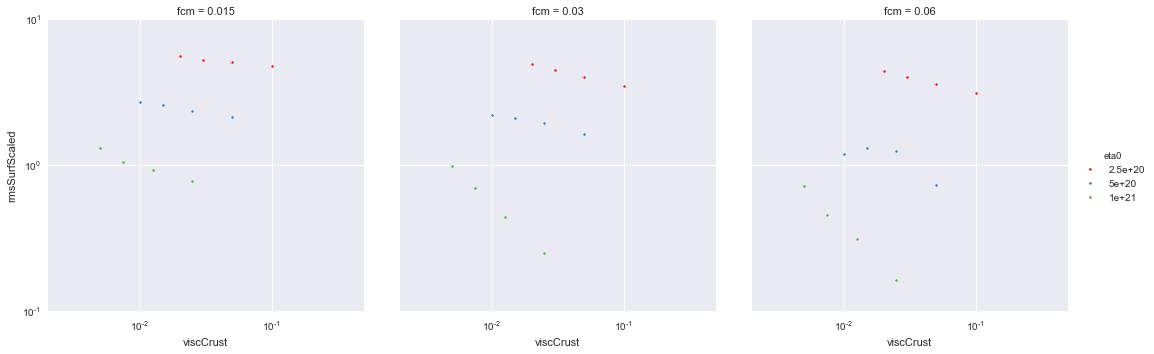

In [82]:
yaxis = 'rmsSurfScaled' #'rmsSurf'#, 'nuTop' #

kws = dict(s=10, linewidth=.5, edgecolor="w")

g = sns.FacetGrid(newdf,col='fcm', hue="eta0", palette="Set1", size=5)
g = g.map(plt.scatter, 'viscCrust', yaxis,  **kws).add_legend()


#g.set(ylim=(1., 1e4))
g.set(xlim=(0.002, 0.5))

g.fig.get_axes()[0].set_yscale('log')
g.fig.get_axes()[0].set_xscale('log')
g.fig.get_axes()[1].set_yscale('log')
g.fig.get_axes()[1].set_xscale('log')
g.fig.get_axes()[2].set_yscale('log')
g.fig.get_axes()[2].set_xscale('log')




plt.show()


In [28]:
import os, sys
subdirectories = natsort(os.listdir(rdir + '/temp_results/results/H/'))

#Note the 4 is hardcoded - this should be the number of files per model - not necesarrily constant either. 
midswarmArray = np.ones((len(subdirectories), 4, 2)) 

for i, d in enumerate(subdirectories):
    fext = '/temp_results/results/H/' + d + '/**/*midSwarm*'
    files = natsort(glob2.glob(rdir + fext))
    for j, fileN in enumerate(files):
        #print(fileN)
        try:
            a = open_file(fileN)
            table = a.root.data
            data = table.read()
            midswarmArray[i, j] = data[data[:,1].argmin(), :]
        except:
            pass

In [29]:
midswarmArray.shape

(36, 4, 2)

21
30


(0.0, 0.15)

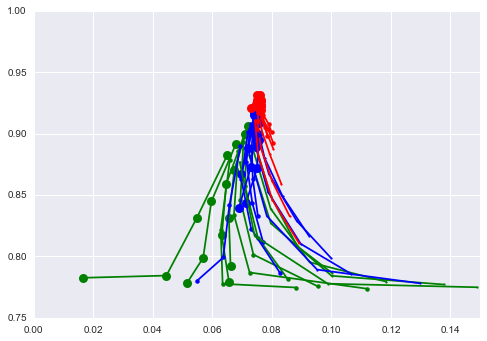

In [37]:
fig, ax = plt.subplots()

for i in range(midswarmArray.shape[0]):
    if float(newdf['eta0'][i]) == 1e21:
        c = 'r'
    elif float(newdf['eta0'][i]) == 5e20:
        c = 'b'
    else:
        c = 'g'
        if midswarmArray[i][:,0].min() < 0.06:
            print(str(i + 1))
    s = float(newdf['fcm'][i]) *150
    #s = float(newdf['eta_max_crust'].iloc[[i]]) /2e18

    ax.plot(midswarmArray[i][:,0], midswarmArray[i][:,1], c=c, marker='o', markersize=s)
    
ax.set_ylim(0.75, 1.)
ax.set_xlim(0., 0.15)

25
34


(0.75, 1.01)

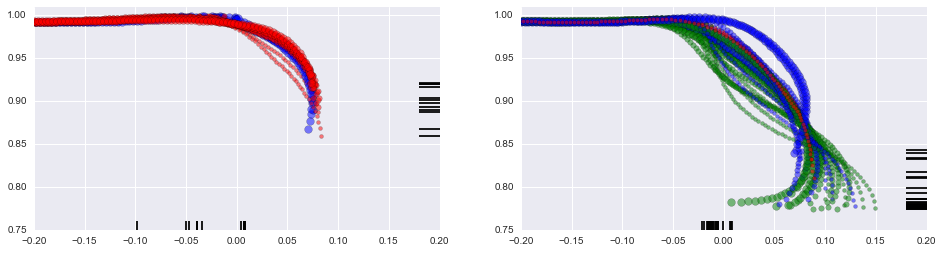

In [31]:
from tables import open_file

fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i, d in enumerate(subdirectories):
    fext = '/temp_results/results/H/' + d + '/**/*midSwarm*'
    files = natsort(glob2.glob(rdir + fext))
    #print(files)
    a = open_file(files[-1])
    table = a.root.data
    data = table.read()
    a.close()
    if float(newdf['eta0'][i]) == 1e21:
        c = 'r'
    elif float(newdf['eta0'][i]) == 5e20:
        c = 'b'
    else:
        c = 'g'
    s = float(newdf['fcm'][i]) *1000
    if data[:,1].min() > 0.85:
        ax1.scatter(data[:,0], data[:,1], c=c, s=s, marker='o', alpha=0.5)
        ax1.hlines(data[:,1].min(), 0.18, 0.2 )
        ax1.vlines(newdf['subzone'][i].min(), 0.75, 0.76 )
        
    else:
        ax2.scatter(data[:,0], data[:,1], c=c, s=s, marker='o', alpha=0.5)
        ax2.hlines(data[:,1].min(), 0.18, 0.2 )
        ax2.vlines(newdf['subzone'][i].min(), 0.75, 0.76 )
        if float(newdf['eta0'][i]) == 1e21:
            print(str(i + 1))
        
    
ax1.set_xlim(-0.2,0.2)
ax2.set_xlim(-0.2,0.2)

ax1.set_ylim(0.75,1.01)
ax2.set_ylim(0.75,1.01)

In [34]:
newdf['realtime'].min()*(((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)

3.7570056334284092

In [148]:
newdf['realtime'].min()*(((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
print((newdf['rmsSurf'].max()*(1e-6/2900e3))*3600*24*365)
print((newdf['rmsintRock'].max()*(1e-6/2900e3))*3600*24*365)

291.636908559
0.00774935127369


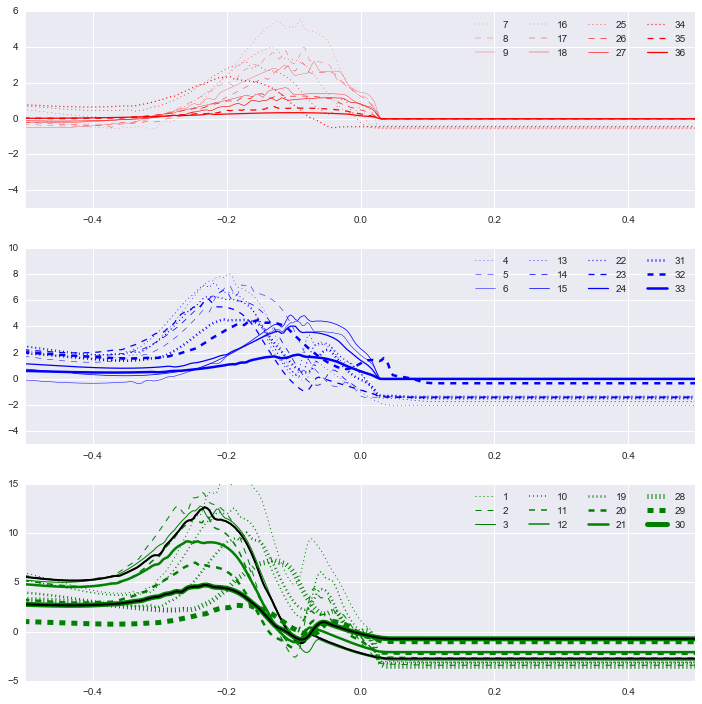

In [124]:
import os, sys
subdirectories = natsort(os.listdir(rdir + '/temp_results/results/H/'))
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

#Note the 4 is hardcoded - this should be the number of files per model - not necesarrily constant either. 
midswarmArray = np.ones((len(subdirectories), 4, 2)) 

surface_xs = np.linspace(-2., 2., 1153)



for i, d in enumerate(subdirectories):
    fext = '/temp_results/results/H/' + d + '/**/*velsurface_600.npy'
    fileN = natsort(glob2.glob(rdir + fext))[0]
    data = np.load(fileN)
    ls = '-'
    lw= 50*newdf['eta_max_crust'][i]/newdf['eta0'][i]
    if float(newdf['eta0'][i]) == 1e21:
        c = 'r'
        if float(newdf['fcm'][i]) == 0.015:
            ls = ':'
        elif float(newdf['fcm'][i]) == 0.03:
            ls = '--'
        ax1.plot(surface_xs, data[:,0]*(1e-6/2900e3)*(100.*3600*24*365), lw = lw, c=c, ls = ls, label= str(i + 1))
    elif float(newdf['eta0'][i]) == 5e20:
        c = 'b'
        if float(newdf['fcm'][i]) == 0.015:
            ls = ':'
        elif float(newdf['fcm'][i]) == 0.03:
            ls = '--'
        ax2.plot(surface_xs, data[:,0]*(1e-6/2900e3)*(100.*3600*24*365), lw = lw, c=c , ls = ls, label= str(i + 1))
    else:
        c = 'g'
        if float(newdf['fcm'][i]) == 0.015:
            ls = ':'
        elif float(newdf['fcm'][i]) == 0.03:
            ls = '--'
        ax3.plot(surface_xs, data[:,0]*(1e-6/2900e3)*(100.*3600*24*365),lw = lw, c=c, ls = ls , label= str(i + 1))
        
        if i == 11 or i == 29:
            ax3.plot(surface_xs, data[:,0]*(1e-6/2900e3)*(100.*3600*24*365),lw = 2, c='k', ls = ls)
            
ax1.set_xlim(-0.5,0.5)
ax1.set_ylim(-5.,6)

ax2.set_xlim(-0.5,0.5)
ax2.set_ylim(-5.,10)

ax3.set_xlim(-0.5,0.5)
ax3.set_ylim(-5.,15)


ax1.legend(ncol=4)
ax2.legend(ncol=4)
ax3.legend(ncol=4)

In [85]:
files

['../../../temp_results/results/H/36/files/velsurface_600.npy']

In [59]:

import os, sys
subdirectories = natsort(os.listdir(rdir + '/temp_results/results/H/'))

Files = []

for i, d in enumerate(subdirectories):
    fext = '/temp_results/results/H/' + d + '/**/*velsurface_600.npy'
    files = natsort(glob2.glob(rdir + fext))
    Files.append(files)
print Files[0]

['../../../temp_results/results/H/1/files/velsurface_600.npy']


## Scratch

In [3]:
#rdir = '/workspace'
rdir = '../../..'

columns = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'ndp.subzone', 'realtime' ]


In [7]:
#r2 = rdir + '/temp_results/results_modelT_2.dat'
r3 = rdir + '/temp_results/results_modelT_3.dat'

#df2 = pd.read_csv(r2, sep="\s*", header=None,  index_col=False).dropna() #kaplan, res =  160 
df3 = pd.read_csv(r3, sep="\s*", header=None,  index_col=False).dropna() #kaplan, res =  192

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [9]:
#df2.columns = columns
df3.columns = columns

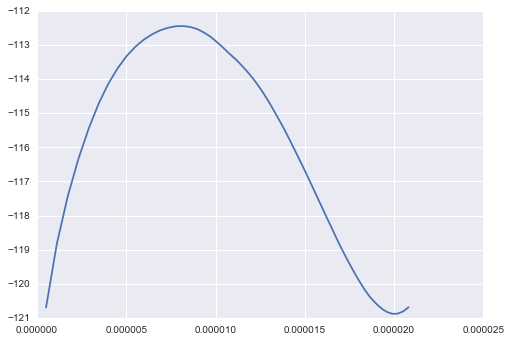

In [10]:
#plt.plot(df2['realtime'], df2['nuTop'],  linestyle="--")
plt.plot(df3['realtime'], df3['nuTop'],  linestyle="-")

In [19]:
t4 = rdir + '/temp_results/results_modelT_4.dat'
d5 = rdir + '/temp_results/results_modelD_5.dat'
d6 = rdir + '/temp_results/results_modelD_6.dat'

In [21]:
dft4 = pd.read_csv(t4, sep="\s*", header=None,  index_col=False).dropna() 
dfd5 = pd.read_csv(d5, sep="\s*", header=None,  index_col=False).dropna() 
dfd6 = pd.read_csv(d6, sep="\s*", header=None,  index_col=False).dropna() 


dft4.columns = columns
dfd5.columns = columns
dfd6.columns = columns

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app
/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warnin

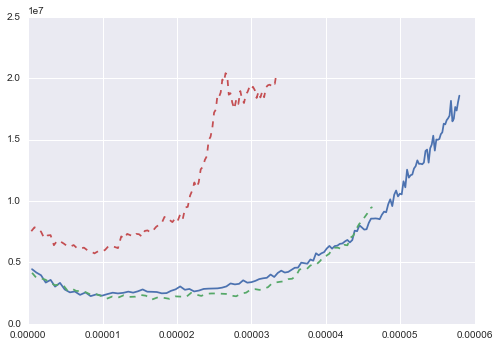

In [22]:
plt.plot(dft4['realtime'], dft4['rmsSurf'],  linestyle="-")
plt.plot(dfd5['realtime'], dfd5['rmsSurf'],  linestyle="--")
plt.plot(dfd6['realtime'], dfd6['rmsSurf'],  linestyle="--")

## test

In [9]:
columns1 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone', 'realtime' ]

columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'ndp.subzone',
            'ndp.lRidge', 'ndp.rRidge', 'realtime']

In [3]:
rdir = '../../../temp_results'

h30 = rdir + '/results_modelH_30.dat'
t6 = rdir + '/results_modelT_6.dat'
t7 = rdir + '/results_modelT_7.dat'

t8 = rdir + '/results_modelT_8.dat'


dfh30 = pd.read_csv(h30, sep="\s*", header=None,  index_col=False).dropna() 
dft6 = pd.read_csv(t6, sep="\s*", header=None,  index_col=False).dropna() 
dft7 = pd.read_csv(t7, sep="\s*", header=None,  index_col=False).dropna() 
dft8 = pd.read_csv(t8, sep="\s*", header=None,  index_col=False).dropna() 



dfh30.columns = columns1
dft6.columns = columns1
dft7.columns = columns1
dft8.columns = columns2



/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/dansandiford/anaconda/lib/p

NameError: name 'columns1' is not defined

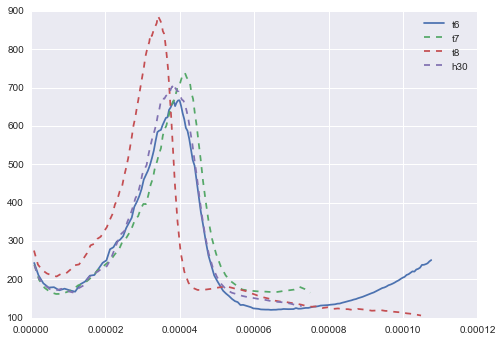

In [13]:
#These are all intances of the same model params
#t7 & h30 run on 16 procs
#t6 ran on 32 procs
#not sure what accounts for the differnce, 
#other than inherent randomness in the particle locations
#Runnign t8 with 40 ppc, on 32 procs

plt.plot(dft6['realtime'], dft6['rmsintRock'],  linestyle="-", label='t6')
plt.plot(dft7['realtime'], dft7['rmsintRock'],  linestyle="--", label='t7')
plt.plot(dft8['realtime'], dft8['rmsintRock'],  linestyle="--", label='t8')

plt.plot(dfh30['realtime'], dfh30['rmsintRock'],  linestyle="--", label='h30')
plt.legend()

In [9]:
path = '../../../temp_results/ndp.pkl'
#dict_files = natsort(glob2.glob(rdir + '/dp.pkl'))
import pickle
with open(path,'rb') as f:
    d = (pickle.load(f))
        

In [10]:
d

{'AGETRACKDEPTH': 0.034482758620689655,
 'CRUSTTOECL': 0.034482758620689655,
 'CRUSTTOMANTLE': 0.27586206896551724,
 'CRUSTVISCUTOFF': 0.05172413793103448,
 'CVR': 16373.52536343703,
 'Edf': 11.512925464970229,
 'HARZBURGDEPTH': 0.013793103448275862,
 'LITHTOMANTLE': 0.3103448275862069,
 'LOWMANTLEDEPTH': 0.22758620689655173,
 'MANTLETOCRUST': 0.005517241379310344,
 'MANTLETOLITH': 0.06896551724137931,
 'RA': 66254181.84000001,
 'StALS': 0.034482758620689655,
 'StRA': 1577480520.0000002,
 'Steta_n': 0.02,
 'Steta_s': 0.02,
 'TBP': 1.0,
 'TOPOHEIGHT': 0.0034482758620689655,
 'TP': 1.195,
 'TPP': 1.0,
 'TS': 0.195,
 'TSP': 0.0,
 'cc': 672800.0000000001,
 'cf': 672800.0000000001,
 'ci': 672800.0000000001,
 'cm': 672800.0000000001,
 'eta_max': 20000.0,
 'eta_max_crust': 0.1,
 'eta_max_fault': 0.1,
 'eta_max_interface': 0.1,
 'eta_min': 0.0002,
 'eta_min_crust': 0.1,
 'eta_min_fault': 0.1,
 'eta_min_interface': 0.1,
 'fccd': 47324415.60000001,
 'fcfd': 47324415.60000001,
 'fcid': 47324415.6

In [12]:
d['subzone'], d['lRidge'], d['rRidge']

(0.0048611111111112049, -0.69513888888888886, 0.69756944444444446)

In [14]:
t1 = rdir + '/results_modelT_1.dat'


In [21]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

In [22]:
dtt1 = pd.read_csv(t1, sep="\s*", header=None,  index_col=False).dropna() 
dtt1.columns = columns2


/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [35]:
print(d['subzone'], d['lRidge'], d['rRidge'])
print(dtt1['subzone'][11], dtt1['lRidge'][11], dtt1['rRidge'][11])
print(dtt1['subzone'][0], dtt1['lRidge'][0], dtt1['rRidge'][0])

(0.0048611111111112049, -0.69513888888888886, 0.69756944444444446)
(0.0048611111111099992, -0.695138888889, 0.69756944444399993)
(0.0097222222222199985, -0.68298611111100005, 0.69756944444399993)


In [35]:
path = '../../../temp_results/md.pkl'
#dict_files = natsort(glob2.glob(rdir + '/dp.pkl'))
import pickle
with open(path,'rb') as f:
    d = (pickle.load(f))
    
d

{'PIC_integration': True,
 'RES': 128,
 'aspectRatio': 6,
 'compBuoyancy': False,
 'elementType': 'Q2/DPC1',
 'periodicBcs': False,
 'ppc': 50.0,
 'refineMesh': True,
 'stickyAir': False,
 'subductionFault': False,
 'symmetricIcs': False,
 'velBcs': False}